# <center> Solving the Black-Scholes equation using Physics-Informed Neural Networks (PINNs) </center>

### Carlos Esteban Gutierrez Guarnizo
cagutierrezgu@unal.edu.co

The following is a project that studies the Black-Scholes equation, which is a partial derivative equation, relevant to the field of finance, enabled the calculation of how changes in an option's price correspond to fluctuations in the underlying asset's value. In this project, physics-informed neural networks (PINNs) were employed to derive numerical solutions to the Black-Scholes equation for pricing European options.

##  $\textbf{Introduction}$

Options are contracts that grant the right to buy or sell an underlying asset within a specific time frame at a predetermined price, known as the strike price. There are two main types of options: call options, which provide the right to buy, and put options, which provide the right to sell. Options are considered financial derivatives because their value is based on the price of the underlying asset. Investors commonly use options for hedging risk by exploiting price differences over time. Options can be classified by their exercise dates: European options can only be exercised at maturity, while American options can be exercised at any time up to maturity. The pricing of options is crucial, as it must reflect a balance where both the seller and buyer are satisfied. Mispricing can lead to unfair outcomes, potentially harming one of the parties involved.

The theoretical estimate of the price of European-style options can be determined using the Black-Scholes model, a mathematical representation of the dynamics of the financial market. The Black-Scholes equation is derived under the following assumptions. (Black & Scholes, 1973)

1. The rate of return on the riskless asset is constant and is therefore called the risk-free interest rate.
2. The stock price follows a geometric Brownian motion, and the drift and volatility of the motion are assumed to be constant.
3. The stock pays no dividend.
4. There is no way to earn a riskless profit.
5. The market has the ability to borrow and lend any amount of money, even fractional amounts, without risk.
6. The market has the ability to buy and sell any amount, even fractional, of the stock.
7. There are no fees or costs associated with the above transactions.

Based on the above assumptions, the Black Scholes equation is derived as (Black & Scholes, 1973)

\begin{equation}
    \dfrac{\partial V}{\partial t} + \dfrac{1}{2}\sigma^2 S^2 \dfrac{\partial^2 V}{\partial S^2} + rS\dfrac{\partial V}{\partial S} -rV = 0 \tag{1}
\end{equation}

where

* $S(t)$ is the price of the underlying asset at time t (also referred as $S_t$),
* $V (t, S)$ is the price of the option as a function of the underlying asset $S$ at time $t$,
* $r$ is the annualized risk-free interest rate, continuously compounded, and
* $\sigma$ is the standard deviation of the stock's returns, also known as volatility.

When talking about a European put and call option problem, we can rename V as C or P in order to denote a European call or put option, respectively. We will consider the European call option, then

\begin{equation}
    \dfrac{\partial C}{\partial t} + \dfrac{1}{2}\sigma^2 S^2 \dfrac{\partial^2 C}{\partial S^2} + rS\dfrac{\partial C}{\partial S} -rC = 0, \tag{2}
\end{equation}

and the following boundary conditions are satisfied over the PDE

\begin{align*}
   &C(t, 0) = 0 &&\text{for all $t \geq 0$} \tag{3}\\
   &C(t, S) \to S - K &&\text{for all $t \geq 0$ as $S \to \infty$} \tag{4}\\
   &C(T, S) = \max\{S - K, 0\} \tag{5}
\end{align*}

where the meaning of the new parameters are

\begin{align*}
   t &&\text{is a time in years,}\\
   C(t, S) &&\text{is the price of the European call option,}\\
   P(T, S) &&\text{is the price of the European put option,}\\
   K &&\text{is the strike price of the option,}\\
   T &&\text{is the time of the option expiration.}
\end{align*}

The analytical solution for a European option of the Black-Scholes equation, which will be used later below, is as follows:

\begin{equation}
    C(T,S) = S\Phi(d_+)-Ke^{-rT}\Phi(d_-), \tag{6}
\end{equation}

where

\begin{equation}
    \Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-t^2/2}dt,\\
    d_{\pm} = \frac{\text{ln}(S/K)+(r\pm\sigma^2/2)T}{\sigma\sqrt{T}}.
\end{equation}

It is important to remember that we have

- Independent variables: $t, S$ (input)
- Dependent variables: $C$ (outputs)

### $\textbf{Method}$

The procedure to solve the Black-Scholes equation for a European call/put option is to use Physics-Informed Neural Networks. PINNs are used to solve a given partial differential equation (PDE) because they incorporate known physical laws into the network model, making them effective at identifying parameters and solving both PDEs and ordinary differential equations. By combining physical understanding with even limited training data, PINNs can achieve highly accurate solutions. The flexibility of PINNs allows them to handle various complex financial problems, such as American options or options with dividends, by modifying the loss function. Additionally, a trained PINN can be used to make predictions on different lattices without retraining, highlighting its advantages over traditional analytical or numerical methods.

#### $\textbf{Loss Function}$

To build the loss function for a Physics-Informed Neural Network (PINN) solving the Black-Scholes equation, the key idea is to combine both the data loss and the physics loss (derived from the governing partial differential equation). The data loss measures how closely the predicted option prices match the generated option prices, and the physics loss measures how well the neural network satisfies the Black-Scholes PDE.

* $\textbf{Physics Loss:}$ This is derived from the Black-Scholes equation itself. We define this loss based on how closely the output of the neural network follows the PDE. Given the neural network $C(t,S)$, the derivatives $\dfrac{\partial C}{\partial t}$, $\dfrac{\partial^2 C}{\partial S^2}$ and $\dfrac{\partial C}{\partial S}$ can be computed using automatic differentiation. Then,

\begin{equation}
    \text{Loss}_{\text{PDE}} = \left|\left|\dfrac{\partial C(t_i,S_i)}{\partial t} + \dfrac{1}{2}\sigma^2 S^2 \dfrac{\partial^2 C(t_i,S_i)}{\partial S^2} + rS\dfrac{\partial C(t_i,S_i)}{\partial S} -rC(t_i,S_i)\right|\right|^2,\tag{7}
\end{equation}

where $\{(t_i,S_i)\}_{i=1}^{N_f}$ is the set of randomly sampled collocation points and $N_f$ the number of the collocation points.

* $\textbf{Data Loss:}$ Regarding the data generated for option prices, this loss function can be defined as follows:

\begin{equation}
    \text{Loss}_{\text{Data}} = \left|\left|C(t,S)-C_{\text{Data}}(t,S)\right|\right|^2.\tag{8}
\end{equation}

Finally, the total loss function can be a weighted sum of these components:

\begin{equation}
    \text{Total Loss} = \lambda_1\times\text{Loss}_{\text{PDE}} + \lambda_2\times\text{Loss}_{\text{Data}} + \lambda_3\times\text{Loss}_{\text{Boundary/Initial conditions}},\tag{9}
\end{equation}

where $\lambda_1$, $\lambda_2$ and $\lambda_3$ are weights that can be adjusted based on the problem requirements, and the loss term associated with $\lambda_3$ is included to guide the network in learning the correct solution.

##  $\textbf{Implementation}$

We will use pytorch for the development of this project. Let's see all the modules and libraries to be used:

In [1]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.autograd as tgrad
import torch.optim as optim
import matplotlib.pyplot as plt
import scipy.stats as si

As mentioned above, the project focuses on a European call option, using a non-dividend paying asset as an example. The parameters of the Black-Scholes model are the following:

In [3]:
K = 40              # Strike Price
r = 0.05            # Interest Rate
sigma = 0.25        # Annual volatility of asset
T = 1               # Time to maturity
S_range = [0, 500]  # Input ranges for asset price
t_range = [0, T]    # Input ranges for time
gs = lambda x: np.fmax(x - K, 0)  # Instrinsic value of call option

The analytical solution to the Black-Scholes equation for a European option was shown in (6). We will define a function to compute this solution for the inputs of the model.

In [4]:
def black_scholes_call_div(X, K, r, sigma):
    T = X[:, 0]
    S = X[:, 1]

    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S/K) + (r - 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    
    call = (S*si.norm.cdf(d1, 0.0, 1.0) - K*np.exp(-r*T)*si.norm.cdf(d2, 0.0, 1.0))
    return call

Now, the grid of data points to be used in the network training process is defined. A uniform distribution is used to generate these data points.

In [5]:
# Points across the grid
def get_diff_data(n):
    X = np.concatenate([np.random.uniform(*t_range, (n, 1)), 
                        np.random.uniform(*S_range, (n, 1))], axis=1)
    y = np.zeros((n, 1))
    return X, y

# Boundary values (Assets limits)
def get_evp_data(n):
    X = np.concatenate([np.ones((n, 1)),
                    np.random.uniform(*S_range, (n, 1))], axis=1)
    y = gs(X[:, 1]).reshape(-1, 1)
    
    return X, y

# Time expiration limits
def get_bvp_data(n):
    X1 = np.concatenate([np.random.uniform(*t_range, (n, 1)),
                        S_range[0] * np.ones((n, 1))], axis=1)
    y1 = np.zeros((n, 1))
    
    X2 = np.concatenate([np.random.uniform(*t_range, (n, 1)), 
                        S_range[-1] * np.ones((n, 1))], axis=1)
    y2 = black_scholes_call_div(X2, K, r, sigma).reshape(-1, 1)
    # y2 = np.array([black_scholes_call_div(X, K, T, r, sigma) for (T, X) in X2]).reshape(-1, 1)
    # y2 = (S_range[-1] - K*np.exp(-r*(T-X2[:, 0].reshape(-1)))).reshape(-1, 1)
    
    return X1, y1, X2, y2

The resulting points plot looks like this.
Here, 1000 points are sampled for expiration / boundary values, and 5000 points are sampled for collocation.

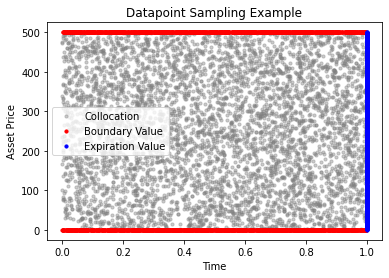

In [6]:
X1, _ = get_diff_data(5000)
X21, _, X22, _ = get_bvp_data(1000)
X3, _ = get_evp_data(1000)

plt.scatter(X1[:,0], X1[:,1], color='gray', s=10, alpha=0.4, label='Collocation')
plt.scatter(X21[:,0], X21[:,1], color='red', s=10, label='Boundary Value')
plt.scatter(X22[:,0], X22[:,1], color='red', s=10)
plt.scatter(X3[:,0], X3[:,1], color='blue', s=10, label='Expiration Value')

plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Datapoint Sampling Example')
plt.legend()

plt.show()

## $\textbf{Model Arquitecture and training}$

* $\textbf{Sigmoid activation, Zeros for weight initialization}$

The first model we are going to build consists of 5 hidden, fully connected layers, each one containing 128 neurons. A sigmoid function is used for activation and is placed after each fully connected layer. The next figure shows the overall architecture of the neural network model.

<img src="images/model_architecture.png" style="width:310px;height:550px;">

In [7]:
class PINN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(PINN, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.hidden_layer1 = nn.Linear(self.input_dim, self.hidden_dim)
        self.hidden_layer2 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.hidden_layer3 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.hidden_layer4 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.hidden_layer5 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.output_layer = nn.Linear(self.hidden_dim, self.output_dim)

        self.activation = torch.sigmoid

        torch.nn.init.zeros_(self.hidden_layer1.weight.data)
        torch.nn.init.zeros_(self.hidden_layer2.weight.data)
        torch.nn.init.zeros_(self.hidden_layer3.weight.data)
        torch.nn.init.zeros_(self.hidden_layer4.weight.data)
        torch.nn.init.zeros_(self.hidden_layer5.weight.data)
        torch.nn.init.zeros_(self.output_layer.weight.data)

    def forward(self, x):
        inputs = x
        layer1_out = self.activation(self.hidden_layer1(inputs))
        layer2_out = self.activation(self.hidden_layer2(layer1_out))
        layer3_out = self.activation(self.hidden_layer3(layer2_out))
        layer4_out = self.activation(self.hidden_layer4(layer3_out))
        layer5_out = self.activation(self.hidden_layer5(layer4_out))
        out = self.output_layer(layer5_out)
        return out

We setup the model architecture with following hyperparameters, and start the training process.

In [8]:
model = PINN(2, 128, 1)         # Input dim, # neurons/layer, Output dim
model.cuda()

n_epochs = 10000                # Number of Epochs
samples = {"pde": 5000, "bvp":5000, "evp":5000}       # Number of samples
criterion = nn.MSELoss()                              # Loss function as shown above
optimizer = optim.Adam(model.parameters(), lr=5e-5)   # Adam Optimizer and lr=5e-5

In [9]:
loss_hist = []

for epoch in range(n_epochs):
    # Loss based on PDE
    X1, y1 = get_diff_data(samples['pde'])
    X1 = torch.from_numpy(X1).float().requires_grad_().cuda()
    y1 = torch.from_numpy(y1).float().cuda()
    
    y1_hat = model(X1)
    
    grads_1 = tgrad.grad(y1_hat, X1, grad_outputs=torch.ones(y1_hat.shape).cuda(), retain_graph=True, create_graph=True, only_inputs=True)[0]
    dV_dt, dV_dS = grads_1[:, 0].view(-1, 1), grads_1[:, 1].view(-1, 1)
    grads_2 = tgrad.grad(dV_dS, X1, grad_outputs=torch.ones(dV_dS.shape).cuda(), create_graph=True, only_inputs=True)[0]
    d2V_dS2 = grads_2[:, 1].view(-1, 1)
    S1 = X1[:, 1].view(-1, 1)
    pde_loss = criterion(-dV_dt, 0.5*((sigma*S1)**2)*d2V_dS2 + r*S1*dV_dS - r*y1_hat)
    
    # Loss based on boundary conditions
    X21, y21, X22, y22 = get_bvp_data(samples['bvp'])
    
    X21 = torch.from_numpy(X21).float().cuda()
    y21 = torch.from_numpy(y21).float().cuda()
    
    X22 = torch.from_numpy(X22).float().cuda()
    y22 = torch.from_numpy(y22).float().cuda()
    
    y21_hat = model(X21)
    bvp1_loss = criterion(y21, y21_hat)
    
    y22_hat = model(X22)
    bvp2_loss = criterion(y22, y22_hat)
    
    # Loss based on expirational conditions
    X3, y3 = get_evp_data(samples['evp'])
    
    X3 = torch.from_numpy(X3).float().cuda()
    y3 = torch.from_numpy(y3).float().cuda()
    
    y3_hat = model(X3)
    evp_loss = criterion(y3, y3_hat)
    
    # Combining the loss functions
    loss = pde_loss + bvp1_loss + bvp2_loss + evp_loss
    
    # Backpropagation and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_hist.append(loss.item())
    if epoch % 100 == 0:
        print(f'{epoch}/{n_epochs} PDE Loss: {pde_loss.item():.5f}, BVP1 Loss: {bvp1_loss.item():.5f}, BVP2 Loss: {bvp2_loss.item():.5f}, EVP Loss: {evp_loss.item():.5f},')
    

C:\Users\hurom\anaconda3\lib\site-packages\torch\autograd\graph.py:768: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\cuda\CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


0/10000 PDE Loss: 0.00000, BVP1 Loss: 0.00152, BVP2 Loss: 212470.09375, EVP Loss: 64427.76172,
100/10000 PDE Loss: 0.00055, BVP1 Loss: 0.21830, BVP2 Loss: 212064.78125, EVP Loss: 64284.85547,
200/10000 PDE Loss: 0.00383, BVP1 Loss: 1.52506, BVP2 Loss: 211374.96875, EVP Loss: 64055.64453,
300/10000 PDE Loss: 0.01105, BVP1 Loss: 4.41256, BVP2 Loss: 210578.32812, EVP Loss: 64183.96094,
400/10000 PDE Loss: 0.02127, BVP1 Loss: 8.50173, BVP2 Loss: 209832.62500, EVP Loss: 63270.19922,
500/10000 PDE Loss: 0.03400, BVP1 Loss: 13.59444, BVP2 Loss: 209129.31250, EVP Loss: 63257.20312,
600/10000 PDE Loss: 0.04902, BVP1 Loss: 19.60442, BVP2 Loss: 208437.31250, EVP Loss: 64211.77344,
700/10000 PDE Loss: 0.06625, BVP1 Loss: 26.49537, BVP2 Loss: 207785.10938, EVP Loss: 62945.22656,
800/10000 PDE Loss: 0.08561, BVP1 Loss: 34.24088, BVP2 Loss: 207137.42188, EVP Loss: 62512.19141,
900/10000 PDE Loss: 0.10706, BVP1 Loss: 42.82004, BVP2 Loss: 206525.17188, EVP Loss: 60941.48828,
1000/10000 PDE Loss: 0.1305

8200/10000 PDE Loss: 6.94175, BVP1 Loss: 2776.69873, BVP2 Loss: 166705.28125, EVP Loss: 45492.41016,
8300/10000 PDE Loss: 7.10671, BVP1 Loss: 2842.68311, BVP2 Loss: 166193.32812, EVP Loss: 45015.42578,
8400/10000 PDE Loss: 7.27349, BVP1 Loss: 2909.39526, BVP2 Loss: 165678.17188, EVP Loss: 45320.77344,
8500/10000 PDE Loss: 7.44222, BVP1 Loss: 2976.88721, BVP2 Loss: 165188.70312, EVP Loss: 44538.41797,
8600/10000 PDE Loss: 7.61283, BVP1 Loss: 3045.13184, BVP2 Loss: 164671.71875, EVP Loss: 44957.66797,
8700/10000 PDE Loss: 7.78526, BVP1 Loss: 3114.10449, BVP2 Loss: 164171.18750, EVP Loss: 44893.18359,
8800/10000 PDE Loss: 7.95971, BVP1 Loss: 3183.88403, BVP2 Loss: 163667.68750, EVP Loss: 42942.83984,
8900/10000 PDE Loss: 8.13612, BVP1 Loss: 3254.44580, BVP2 Loss: 163167.68750, EVP Loss: 43983.92188,
9000/10000 PDE Loss: 8.31443, BVP1 Loss: 3325.77100, BVP2 Loss: 162655.67188, EVP Loss: 45158.53125,
9100/10000 PDE Loss: 8.49463, BVP1 Loss: 3397.85107, BVP2 Loss: 162147.84375, EVP Loss: 446

Let's take a first look at the loss function as the number of epochs increases.

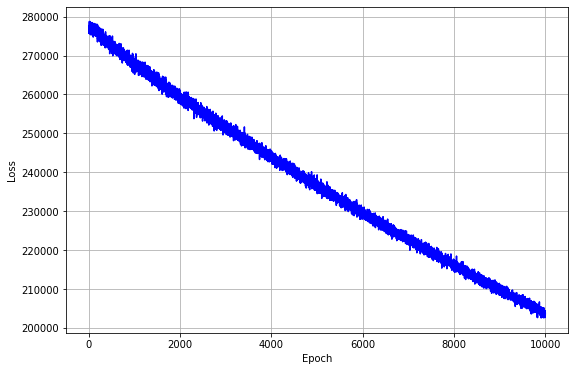

In [10]:
x_len = np.arange(len(loss_hist))
plt.figure(figsize=(9, 6))
plt.plot(x_len, loss_hist, c='blue', label="Train-set Loss")
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

We can also compare the PINN predicted results with the true values of the function. It is evident that there is a large difference between these two lines, so we will propose alternatives to solve this problem.

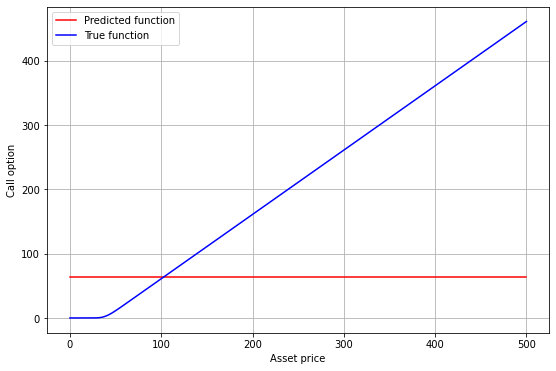

In [11]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

np.seterr(divide = 'ignore')
fig, ax = plt.subplots(figsize=(9, 6))

X_cmp = np.concatenate([0.5*np.ones((1000, 1)),
                        np.linspace(0, 500, num=1000).reshape(-1, 1)], axis=1)
Y_pred = model(torch.from_numpy(X_cmp).float().requires_grad_().cuda()).cpu().detach()
Y_true = black_scholes_call_div(X_cmp, K, r, sigma)

X_cmp = np.linspace(0, 500, num=1000)

ax.plot(X_cmp, Y_pred, c='red', label="Predicted function")
ax.plot(X_cmp, Y_true, c='blue', label="True function")

legend_without_duplicate_labels(ax)

plt.grid()
plt.xlabel('Asset price')
plt.ylabel('Call option')

plt.show()

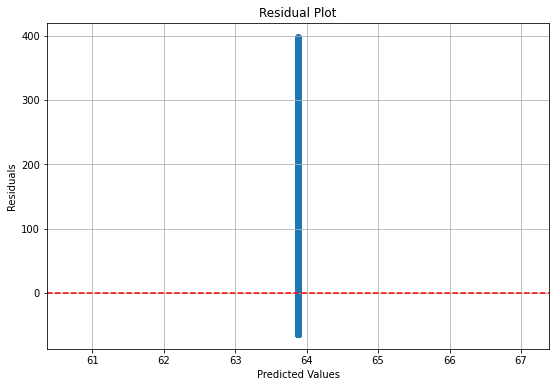

In [12]:
residuals = Y_true - np.transpose(Y_pred.numpy())[0]
plt.figure(figsize=(9, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()

* $\textbf{ReLu activation, Zeros for weight initialization}$

In order to improve the overall quality of the training, the activation functions are changed to ReLU function instead of sigmoid function, so mitigates gradient vanishing problems in deep neural networks, thus showing better convergence performance.

In [13]:
class PINN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(PINN, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.hidden_layer1 = nn.Linear(self.input_dim, self.hidden_dim)
        self.hidden_layer2 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.hidden_layer3 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.hidden_layer4 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.hidden_layer5 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.output_layer = nn.Linear(self.hidden_dim, self.output_dim)

        self.activation = torch.relu

        torch.nn.init.zeros_(self.hidden_layer1.weight.data)
        torch.nn.init.zeros_(self.hidden_layer2.weight.data)
        torch.nn.init.zeros_(self.hidden_layer3.weight.data)
        torch.nn.init.zeros_(self.hidden_layer4.weight.data)
        torch.nn.init.zeros_(self.hidden_layer5.weight.data)
        torch.nn.init.zeros_(self.output_layer.weight.data)

    def forward(self, x):
        inputs = x
        layer1_out = self.activation(self.hidden_layer1(inputs))
        layer2_out = self.activation(self.hidden_layer2(layer1_out))
        layer3_out = self.activation(self.hidden_layer3(layer2_out))
        layer4_out = self.activation(self.hidden_layer4(layer3_out))
        layer5_out = self.activation(self.hidden_layer5(layer4_out))
        out = self.output_layer(layer5_out)
        return out

In [14]:
model = PINN(2, 128, 1)
model.cuda()

n_epochs = 10000
samples = {"pde": 5000, "bvp":5000, "evp":5000}
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)

In [15]:
loss_hist = []

for epoch in range(n_epochs):
    # Loss based on PDE
    X1, y1 = get_diff_data(samples['pde'])
    X1 = torch.from_numpy(X1).float().requires_grad_().cuda()
    y1 = torch.from_numpy(y1).float().cuda()
    
    y1_hat = model(X1)
    
    grads_1 = tgrad.grad(y1_hat, X1, grad_outputs=torch.ones(y1_hat.shape).cuda(), retain_graph=True, create_graph=True, only_inputs=True)[0]
    dV_dt, dV_dS = grads_1[:, 0].view(-1, 1), grads_1[:, 1].view(-1, 1)
    grads_2 = tgrad.grad(dV_dS, X1, grad_outputs=torch.ones(dV_dS.shape).cuda(), create_graph=True, only_inputs=True)[0]
    d2V_dS2 = grads_2[:, 1].view(-1, 1)
    S1 = X1[:, 1].view(-1, 1)
    pde_loss = criterion(-dV_dt, 0.5*((sigma*S1)**2)*d2V_dS2 + r*S1*dV_dS - r*y1_hat)
    
    # Loss based on boundary conditions
    X21, y21, X22, y22 = get_bvp_data(samples['bvp'])
    
    X21 = torch.from_numpy(X21).float().cuda()
    y21 = torch.from_numpy(y21).float().cuda()
    
    X22 = torch.from_numpy(X22).float().cuda()
    y22 = torch.from_numpy(y22).float().cuda()
    
    y21_hat = model(X21)
    bvp1_loss = criterion(y21, y21_hat)
    
    y22_hat = model(X22)
    bvp2_loss = criterion(y22, y22_hat)
    
    # Loss based on expirational conditions
    X3, y3 = get_evp_data(samples['evp'])
    
    X3 = torch.from_numpy(X3).float().cuda()
    y3 = torch.from_numpy(y3).float().cuda()
    
    y3_hat = model(X3)
    evp_loss = criterion(y3, y3_hat)
    
    # Combining the loss functions
    loss = pde_loss + bvp1_loss + bvp2_loss + evp_loss
    
    # Backpropagation and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_hist.append(loss.item())
    if epoch % 100 == 0:
        print(f'{epoch}/{n_epochs} PDE Loss: {pde_loss.item():.5f}, BVP1 Loss: {bvp1_loss.item():.5f}, BVP2 Loss: {bvp2_loss.item():.5f}, EVP Loss: {evp_loss.item():.5f},')
    

0/10000 PDE Loss: 0.00000, BVP1 Loss: 0.00032, BVP2 Loss: 212475.60938, EVP Loss: 65795.53906,
100/10000 PDE Loss: 0.00001, BVP1 Loss: 0.00422, BVP2 Loss: 212376.35938, EVP Loss: 63833.34375,
200/10000 PDE Loss: 0.00040, BVP1 Loss: 2.89990, BVP2 Loss: 181827.73438, EVP Loss: 54130.92969,
300/10000 PDE Loss: 0.04383, BVP1 Loss: 180.97699, BVP2 Loss: 4.94421, EVP Loss: 906.86267,
400/10000 PDE Loss: 0.01820, BVP1 Loss: 170.85248, BVP2 Loss: 54.81339, EVP Loss: 735.88336,
500/10000 PDE Loss: 0.00375, BVP1 Loss: 166.59132, BVP2 Loss: 56.10436, EVP Loss: 732.76929,
600/10000 PDE Loss: 0.00042, BVP1 Loss: 162.05032, BVP2 Loss: 55.03777, EVP Loss: 720.71851,
700/10000 PDE Loss: 0.01029, BVP1 Loss: 157.23465, BVP2 Loss: 54.32241, EVP Loss: 711.87280,
800/10000 PDE Loss: 0.03510, BVP1 Loss: 152.16754, BVP2 Loss: 53.24055, EVP Loss: 726.51965,
900/10000 PDE Loss: 0.07611, BVP1 Loss: 147.01031, BVP2 Loss: 52.73447, EVP Loss: 692.31659,
1000/10000 PDE Loss: 0.13414, BVP1 Loss: 141.64552, BVP2 Loss

8800/10000 PDE Loss: 26.53282, BVP1 Loss: 0.01286, BVP2 Loss: 6.53936, EVP Loss: 18.92921,
8900/10000 PDE Loss: 21.01781, BVP1 Loss: 0.01317, BVP2 Loss: 5.83853, EVP Loss: 12.21386,
9000/10000 PDE Loss: 15.88227, BVP1 Loss: 0.01343, BVP2 Loss: 4.85780, EVP Loss: 7.58774,
9100/10000 PDE Loss: 11.13235, BVP1 Loss: 0.01364, BVP2 Loss: 4.08460, EVP Loss: 4.48693,
9200/10000 PDE Loss: 7.40888, BVP1 Loss: 0.01379, BVP2 Loss: 3.46638, EVP Loss: 2.33349,
9300/10000 PDE Loss: 4.48761, BVP1 Loss: 0.01391, BVP2 Loss: 2.97839, EVP Loss: 1.24654,
9400/10000 PDE Loss: 2.52291, BVP1 Loss: 0.01399, BVP2 Loss: 2.57034, EVP Loss: 0.60387,
9500/10000 PDE Loss: 1.28380, BVP1 Loss: 0.01403, BVP2 Loss: 2.18796, EVP Loss: 0.30856,
9600/10000 PDE Loss: 0.57415, BVP1 Loss: 0.01406, BVP2 Loss: 1.83731, EVP Loss: 0.15200,
9700/10000 PDE Loss: 0.22018, BVP1 Loss: 0.01406, BVP2 Loss: 1.67323, EVP Loss: 0.09283,
9800/10000 PDE Loss: 0.06027, BVP1 Loss: 0.01406, BVP2 Loss: 1.45371, EVP Loss: 0.04072,
9900/10000 PDE 

The following are the results achieved with ReLu activation.

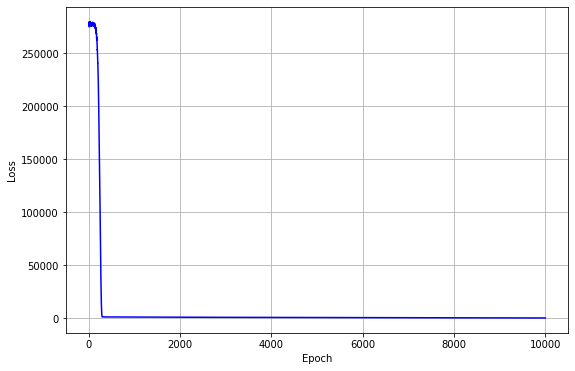

In [16]:
x_len = np.arange(len(loss_hist))
plt.figure(figsize=(9, 6))
plt.plot(x_len, loss_hist, c='blue', label="Train-set Loss")
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

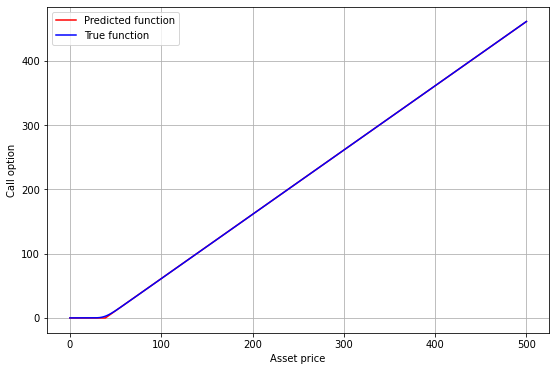

In [17]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

np.seterr(divide = 'ignore')
fig, ax = plt.subplots(figsize=(9, 6))

X_cmp = np.concatenate([0.5*np.ones((1000, 1)),
                        np.linspace(0, 500, num=1000).reshape(-1, 1)], axis=1)
Y_pred = model(torch.from_numpy(X_cmp).float().requires_grad_().cuda()).cpu().detach()
Y_true = black_scholes_call_div(X_cmp, K, r, sigma)

X_cmp = np.linspace(0, 500, num=1000)

ax.plot(X_cmp, Y_pred, c='red', label="Predicted function")
ax.plot(X_cmp, Y_true, c='blue', label="True function")

legend_without_duplicate_labels(ax)

plt.grid()
plt.xlabel('Asset price')
plt.ylabel('Call option')

plt.show()

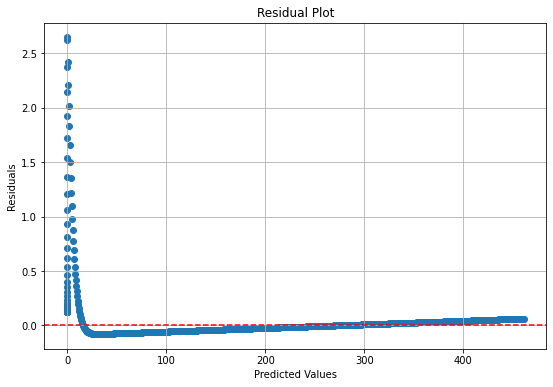

In [18]:
residuals = Y_true - np.transpose(Y_pred.numpy())[0]
plt.figure(figsize=(9, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()

* $\textbf{ReLu activation, Xavier Normal weights initialization}$

Despite the overall quality of the training has improved significantly, we can also prove the PINN using a different weight initialization. Xavier normal initialization scheme initializes the weights at each layer to

\begin{equation}
    W \sim \mathcal{N}\left(0,\sqrt{\frac{2}{n_{\text{in}}+n_{\text{out}}}}\right),\tag{10}
\end{equation}

where $n_{\text{in}}$ is the size of the previous layer, and $n_{\text{out}}$ is the size of the next layer. Here is the training process for this new PINN.

In [19]:
class PINN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(PINN, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.hidden_layer1 = nn.Linear(self.input_dim, self.hidden_dim)
        self.hidden_layer2 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.hidden_layer3 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.hidden_layer4 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.hidden_layer5 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.output_layer = nn.Linear(self.hidden_dim, self.output_dim)

        self.activation = torch.relu

        torch.nn.init.xavier_normal_(self.hidden_layer1.weight.data)
        torch.nn.init.xavier_normal_(self.hidden_layer2.weight.data)
        torch.nn.init.xavier_normal_(self.hidden_layer3.weight.data)
        torch.nn.init.xavier_normal_(self.hidden_layer4.weight.data)
        torch.nn.init.xavier_normal_(self.hidden_layer5.weight.data)
        torch.nn.init.xavier_normal_(self.output_layer.weight.data)

    def forward(self, x):
        inputs = x
        layer1_out = self.activation(self.hidden_layer1(inputs))
        layer2_out = self.activation(self.hidden_layer2(layer1_out))
        layer3_out = self.activation(self.hidden_layer3(layer2_out))
        layer4_out = self.activation(self.hidden_layer4(layer3_out))
        layer5_out = self.activation(self.hidden_layer5(layer4_out))
        out = self.output_layer(layer5_out)
        return out

In [20]:
model = PINN(2, 128, 1)
model.cuda()

n_epochs = 10000
samples = {"pde": 5000, "bvp":5000, "evp":5000}
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)

In [21]:
loss_hist = []

for epoch in range(n_epochs):
    # Loss based on PDE
    X1, y1 = get_diff_data(samples['pde'])
    X1 = torch.from_numpy(X1).float().requires_grad_().cuda()
    y1 = torch.from_numpy(y1).float().cuda()
    
    y1_hat = model(X1)
    
    grads_1 = tgrad.grad(y1_hat, X1, grad_outputs=torch.ones(y1_hat.shape).cuda(), retain_graph=True, create_graph=True, only_inputs=True)[0]
    dV_dt, dV_dS = grads_1[:, 0].view(-1, 1), grads_1[:, 1].view(-1, 1)
    grads_2 = tgrad.grad(dV_dS, X1, grad_outputs=torch.ones(dV_dS.shape).cuda(), create_graph=True, only_inputs=True)[0]
    d2V_dS2 = grads_2[:, 1].view(-1, 1)
    S1 = X1[:, 1].view(-1, 1)
    pde_loss = criterion(-dV_dt, 0.5*((sigma*S1)**2)*d2V_dS2 + r*S1*dV_dS - r*y1_hat)
    
    # Loss based on boundary conditions
    X21, y21, X22, y22 = get_bvp_data(samples['bvp'])
    
    X21 = torch.from_numpy(X21).float().cuda()
    y21 = torch.from_numpy(y21).float().cuda()
    
    X22 = torch.from_numpy(X22).float().cuda()
    y22 = torch.from_numpy(y22).float().cuda()
    
    y21_hat = model(X21)
    bvp1_loss = criterion(y21, y21_hat)
    
    y22_hat = model(X22)
    bvp2_loss = criterion(y22, y22_hat)
    
    # Loss based on expirational conditions
    X3, y3 = get_evp_data(samples['evp'])
    
    X3 = torch.from_numpy(X3).float().cuda()
    y3 = torch.from_numpy(y3).float().cuda()
    
    y3_hat = model(X3)
    evp_loss = criterion(y3, y3_hat)
    
    # Combining the loss functions
    loss = pde_loss + bvp1_loss + bvp2_loss + evp_loss
    
    # Backpropagation and update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_hist.append(loss.item())
    if epoch % 100 == 0:
        print(f'{epoch}/{n_epochs} PDE Loss: {pde_loss.item():.5f}, BVP1 Loss: {bvp1_loss.item():.5f}, BVP2 Loss: {bvp2_loss.item():.5f}, EVP Loss: {evp_loss.item():.5f},')
    

0/10000 PDE Loss: 0.00328, BVP1 Loss: 0.00042, BVP2 Loss: 236709.09375, EVP Loss: 72496.04688,
100/10000 PDE Loss: 0.00028, BVP1 Loss: 0.00172, BVP2 Loss: 109154.78906, EVP Loss: 32176.21094,
200/10000 PDE Loss: 0.00727, BVP1 Loss: 0.00048, BVP2 Loss: 2395.58765, EVP Loss: 575.93091,
300/10000 PDE Loss: 0.06902, BVP1 Loss: 0.03427, BVP2 Loss: 26.61298, EVP Loss: 347.49164,
400/10000 PDE Loss: 0.17552, BVP1 Loss: 0.01716, BVP2 Loss: 20.78386, EVP Loss: 286.20984,
500/10000 PDE Loss: 0.49674, BVP1 Loss: 0.00717, BVP2 Loss: 14.17187, EVP Loss: 214.36467,
600/10000 PDE Loss: 1.31736, BVP1 Loss: 0.00015, BVP2 Loss: 10.43562, EVP Loss: 113.74201,
700/10000 PDE Loss: 2.99548, BVP1 Loss: 0.00085, BVP2 Loss: 3.59279, EVP Loss: 41.12970,
800/10000 PDE Loss: 3.27806, BVP1 Loss: 0.00090, BVP2 Loss: 2.08140, EVP Loss: 9.56565,
900/10000 PDE Loss: 2.28243, BVP1 Loss: 0.00011, BVP2 Loss: 0.96778, EVP Loss: 1.45202,
1000/10000 PDE Loss: 1.47196, BVP1 Loss: 0.00001, BVP2 Loss: 0.51311, EVP Loss: 0.3367

9200/10000 PDE Loss: 0.03966, BVP1 Loss: 0.00000, BVP2 Loss: 0.34142, EVP Loss: 0.11818,
9300/10000 PDE Loss: 0.02941, BVP1 Loss: 0.00001, BVP2 Loss: 0.37683, EVP Loss: 0.16495,
9400/10000 PDE Loss: 0.04795, BVP1 Loss: 0.00000, BVP2 Loss: 0.33610, EVP Loss: 0.04405,
9500/10000 PDE Loss: 0.04876, BVP1 Loss: 0.00000, BVP2 Loss: 0.38931, EVP Loss: 0.02005,
9600/10000 PDE Loss: 0.03756, BVP1 Loss: 0.00000, BVP2 Loss: 0.68535, EVP Loss: 0.22485,
9700/10000 PDE Loss: 0.03407, BVP1 Loss: 0.00000, BVP2 Loss: 0.76965, EVP Loss: 0.36086,
9800/10000 PDE Loss: 0.03700, BVP1 Loss: 0.00001, BVP2 Loss: 0.39980, EVP Loss: 0.48591,
9900/10000 PDE Loss: 0.04038, BVP1 Loss: 0.00003, BVP2 Loss: 1.04518, EVP Loss: 0.25938,


### $\textbf{Final Results}$

Finally, we plot the results of the last PINN trained to check the performance of the model with Xavier initialization.

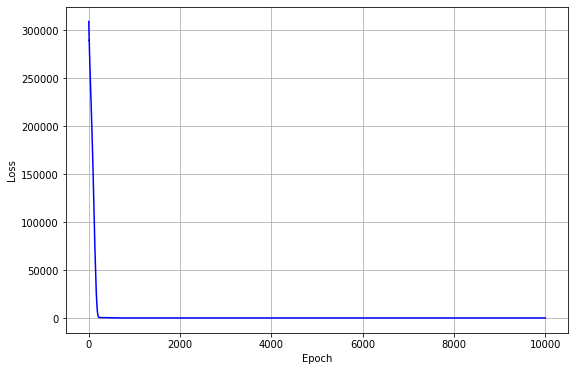

In [22]:
x_len = np.arange(len(loss_hist))
plt.figure(figsize=(9, 6))
plt.plot(x_len, loss_hist, c='blue', label="Train-set Loss")
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

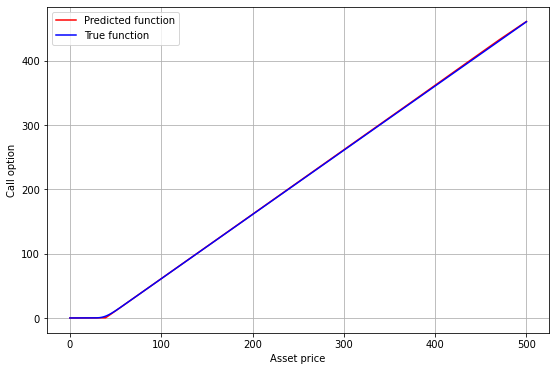

In [23]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

np.seterr(divide = 'ignore')
fig, ax = plt.subplots(figsize=(9, 6))

X_cmp = np.concatenate([0.5*np.ones((1000, 1)),
                        np.linspace(0, 500, num=1000).reshape(-1, 1)], axis=1)
Y_pred = model(torch.from_numpy(X_cmp).float().requires_grad_().cuda()).cpu().detach()
Y_true = black_scholes_call_div(X_cmp, K, r, sigma)

X_cmp = np.linspace(0, 500, num=1000)

ax.plot(X_cmp, Y_pred, c='red', label="Predicted function")
ax.plot(X_cmp, Y_true, c='blue', label="True function")

legend_without_duplicate_labels(ax)

plt.grid()
plt.xlabel('Asset price')
plt.ylabel('Call option')

plt.show()

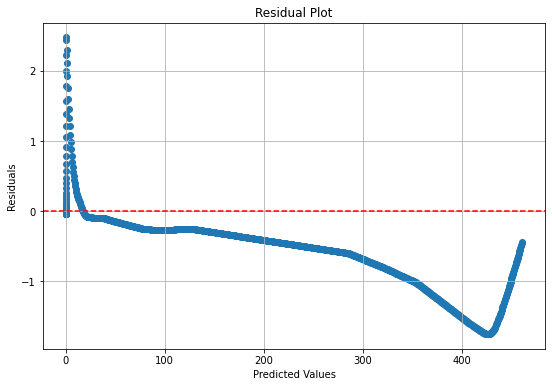

In [24]:
residuals = Y_true - np.transpose(Y_pred.numpy())[0]
plt.figure(figsize=(9, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()

<ipython-input-25-e9492339db24>:6: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)


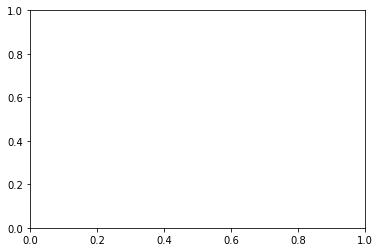

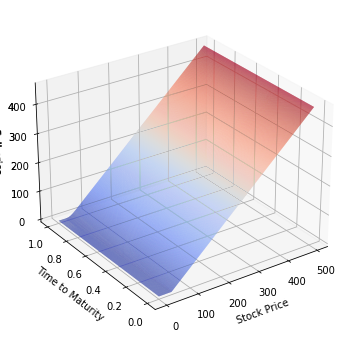

<Figure size 648x432 with 0 Axes>

In [25]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

fig, ax = plt.subplots()
Y_pred_arr, Y_true_arr = [], []

for t in np.linspace(0, 1, num=1000):
    X_cmp = np.concatenate([t*np.ones((1000, 1)),
                            np.linspace(0, 500, num=1000).reshape(-1, 1)], axis=1)
    Y_pred = model(torch.from_numpy(X_cmp).float().requires_grad_().cuda()).cpu().detach()
    Y_true = black_scholes_call_div(X_cmp, K, r, sigma)
    Y_pred_arr.append(np.array(Y_pred))
    Y_true_arr.append(np.array(Y_true))

X, Y = np.meshgrid(np.linspace(0, 500, num=1000), np.linspace(0, 1, num=1000))

Y_pred_arr = np.array(Y_pred_arr).reshape(1000, 1000)
Y_true_arr = np.array(Y_true_arr).reshape(1000, 1000)

figcp = plt.figure(figsize=(9, 6))
ax = figcp.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Y_pred_arr, rstride=1, cstride=1, cmap=cm.coolwarm, shade='interp')
ax.view_init(27,-125)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Maturity')
ax.set_zlabel('Call price')

figct = plt.figure(figsize=(9, 6))
ax = figcp.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Y_true_arr, rstride=1, cstride=1, cmap=cm.coolwarm, shade='interp')
ax.view_init(27,-125)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Maturity')
ax.set_zlabel('Call price')

plt.show()

## Conclusions

This project shows different configurations of PINNs, mainly changes in the hyperparameter settings, that were performed to show that the Black-Scholes equation can be approximated using this type of neural network under the assumption of a European option. The model was trained on a synthetically generated dataset and optimized using the Adam algorithm. The results indicate that PINNs can approximate the solution of the Black-Scholes equation with very high accuracy.

It should be noted that the results obtained here have been adapted to significantly improve the loss functions just by modifying the hyperparameters of the neural network, all this without modifying the architecture of the network itself, which has a fairly simple form and can be very widely replicated. Furthermore, in this particular case of PINN, by choosing the appropriate hyperparameters, a relatively low loss value is achieved with few training epochs, which is not always the case when training a PINN.

Finally, this project can be expanded handle different options markets. By adjusting the loss function, the model can approximate solutions for the Black-Scholes model with non-zero dividends or handle different option styles, such as American options. Overall, the implemented PINN model is adaptable and can be easily extended to solve these different scenarios.

## References

* Fischer Black and Myron Scholes. The pricing of options and corporate liabilities. Journal of political economy, 81(3):637–654, 1973.
* Fischer Black. The pricing of commodity contracts. Journal of financial economics, 3(1-2):167–179, 1976.
* Amirhossein Arzani, Jian-Xun Wang, and Roshan M D’Souza. Uncovering near-wall blood flow from sparse data with physics-informed neural networks. Physics of Fluids, 33(7):071905, 2021.
* Github Repository: https://github.com/keonly/black-scholes-pinn